# scqubits example: zero-pi qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# zero-pi qubit (decoupled from zeta-mode)

$H=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J} +2E_{C\Sigma}dC_J\,\partial_\phi\partial_\theta + E_J dE_J \sin\theta\sin(\phi-\phi_\text{ext}/2)$

In [2]:
zero_pi = scq.ZeroPi.create()

Output()

Diagonlization of zero-pi proceeds in a hybrid basis, using charge basis for $\theta$ and discretization over a final interval for $\phi$. (The latter explains the need for providing grid parameters.)

In [3]:
zero_pi = scq.ZeroPi(
    grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200),
    EJ   = 10.0,
    EL   = 0.04,
    ECJ  = 20.0,
    EC = 0.04,
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)

In [3]:
print(zero_pi)

ZeroPi--------------|
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.0
                    | dCJ: 0.0
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | truncated_dim: 10
                    |
                    | dim: 12200



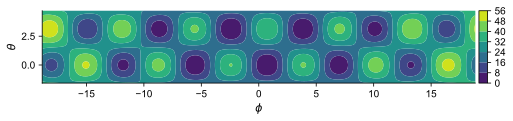

In [5]:
### Potential energy for symmetric 0-$\pi$ qubit
zero_pi.plot_potential();

### Eigenenergies

In [4]:
zero_pi.flux = 0.31
zero_pi.eigenvals(evals_count=10)

array([17.0014342 , 17.02182808, 18.1214257 , 18.13868249, 18.72196777,
       18.93031195, 19.16309846, 19.17777943, 19.92663351, 20.0898962 ])

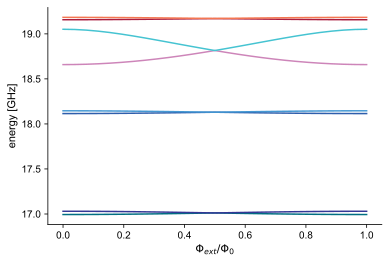

In [7]:
flux_list = np.linspace(0, 1, 27)
zero_pi.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

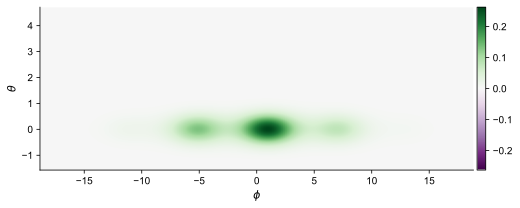

In [8]:
fig, ax = zero_pi.plot_wavefunction(which=0, mode='real', zero_calibrate=True);

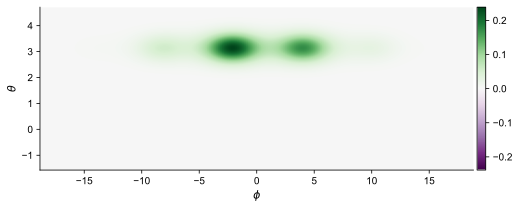

In [10]:
zero_pi.plot_wavefunction(which=1, mode='real', zero_calibrate=True);

# Full zero-pi qubit (incl. zeta-mode)

In [4]:
full_zpi = scq.FullZeroPi.create()

Output()

In [5]:
print(full_zpi)

FullZeroPi----------|
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.05
                    | dCJ: 0.05
                    | dC: 0.08
                    | dEL: 0.05
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | zeropi_cutoff: 10
                    | zeta_cutoff: 40
                    | truncated_dim: 10
                    |
                    | dim: 400   --[ (theta, phi): 21960 total, 10 truncated;  (zeta): 40 ]--

